In [1]:
from qiskit import *
from qiskit.circuit.library import SXdgGate
from qiskit.visualization import plot_histogram

In [2]:
#ZPLG gate
qc = QuantumCircuit(5)
qc.cx(1, 4)
qc.cx(3, 0)
qc.csx(0, 3)
qc.csx(1, 3)
qc.cx(0, 1)
qc.csx(2, 3)
qc.cx(1, 2)

csxdg_gate = SXdgGate().control()
qc.append(csxdg_gate, [2, 3])

qc.cx(3, 4)
zplg_gate = qc.to_gate()
my_gate = QuantumCircuit(5)
my_gate.append(zplg_gate, [0,1,2,3,4])
my_gate.draw()


#doublefeynman gate
qcf = QuantumCircuit(3)
qcf.cx(0, 2)
qcf.cx(0, 1)
f2g_gate = qcf.to_gate()
f2g_gate

In [6]:
def AU1(S0, S1,S2, S3, Cin, A, B):
    qc = QuantumCircuit(9, 2)
    
    #conditions
    if(A == '1'):
        qc.x(1)
    if(S0 == '1'):
        qc.x(0)
    if(S1== '1'):
        qc.x(4)
    if(Cin == '1'):
        qc.x(6) 
    if(B == '1'):
        qc.x(3)
    if(S2 == '1'):
        qc.x(5)
    if(S3 == '1'):
        qc.x(8)
    qc.barrier()
    
    #adding the f2g gate
    qc.append(f2g_gate, [0, 1, 2])
    
    #adding the fredkin gate
    qc.cswap(3, 4, 5)
    
    #importing the zplg gate
    qc.append(zplg_gate, [6, 4, 1, 7, 3])
    
    #adding the double feynman gate
    qc.append(f2g_gate, [8, 1, 3])
    
    #measurements of the carry
    qc.measure(7, 0)
    
    #measuring the output
    qc.measure(3, 1)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

S0 S1 S2 S3 Cin A B = s carry
0  0  0  0  0  0  0 = 00
0  0  0  0  0  0  1 = 10
0  0  0  0  0  1  0 = 00
0  0  0  0  0  1  1 = 10
0  0  0  0  1  0  0 = 00
0  0  0  0  1  0  1 = 10
0  0  0  0  1  1  0 = 11
0  0  0  0  1  1  1 = 01
0  0  0  1  0  0  0 = 10
0  0  0  1  0  0  1 = 00
0  0  0  1  0  1  0 = 10
0  0  0  1  0  1  1 = 00
0  0  0  1  1  0  0 = 10
0  0  0  1  1  0  1 = 00
0  0  0  1  1  1  0 = 01
0  0  0  1  1  1  1 = 11
----------------------
0  0  1  0  0  0  0 = 00
0  0  1  0  0  0  1 = 00
0  0  1  0  0  1  0 = 00
0  0  1  0  0  1  1 = 11
0  0  1  0  1  0  0 = 00
0  0  1  0  1  0  1 = 11
0  0  1  0  1  1  0 = 11
0  0  1  0  1  1  1 = 11
0  0  1  1  0  0  0 = 10
0  0  1  1  0  0  1 = 10
0  0  1  1  0  1  0 = 10
0  0  1  1  0  1  1 = 01
0  0  1  1  1  0  0 = 10
0  0  1  1  1  0  1 = 01
0  0  1  1  1  1  0 = 01
0  0  1  1  1  1  1 = 01
----------------------
0  1  0  0  0  0  0 = 10
0  1  0  0  0  0  1 = 10
0  1  0  0  0  1  0 = 01
0  1  0  0  0  1  1 = 10
0  1  0  0  1  0  0 = 01

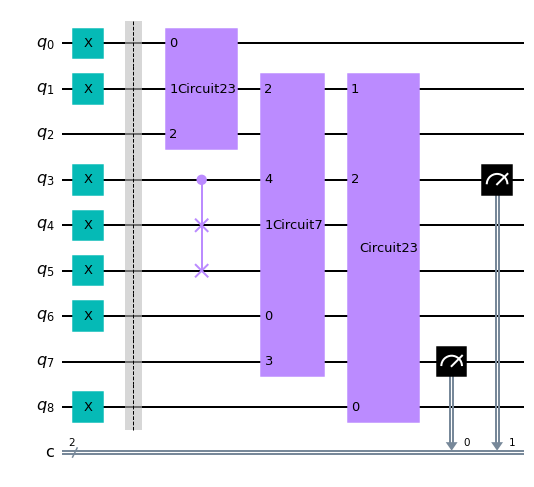

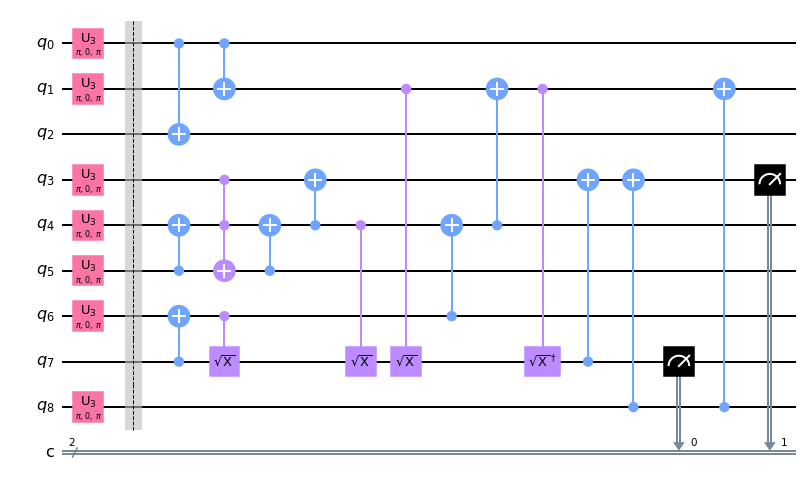

In [7]:
print('{} {} {} {} {} {} {}'.format('S0', 'S1', 'S2', 'S3', 'Cin', 'A', 'B'), '=', 's carry')
for S0 in ['0', '1']:
    for S1 in ['0', '1']:
        for S2 in ['0', '1']:
            for S3 in ['0', '1']:
                for Cin in ['0', '1']:
                    for A in ['0', '1']:
                        for B in ['0', '1']: 
                            qc, output = AU1(S0, S1, S2, S3, Cin, A, B)
                            print('{}  {}  {}  {}  {}  {}  {}'.format(S0, S1, S2, S3, Cin, A, B), '=', output)
            print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))